In [2]:
import cv2

b = cv2.imread('noisy-fingerprint.tif')

In [11]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))


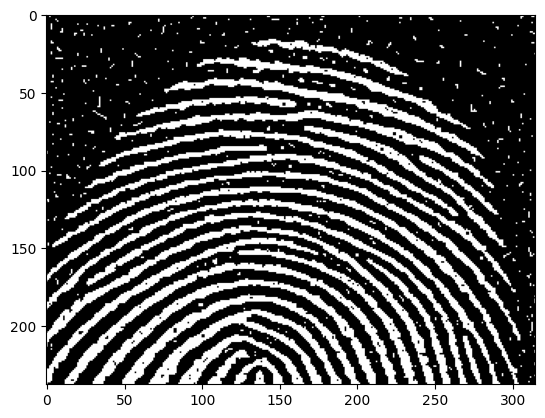

In [12]:
import matplotlib.pyplot as plt

plt.imshow(b, cmap='gray')

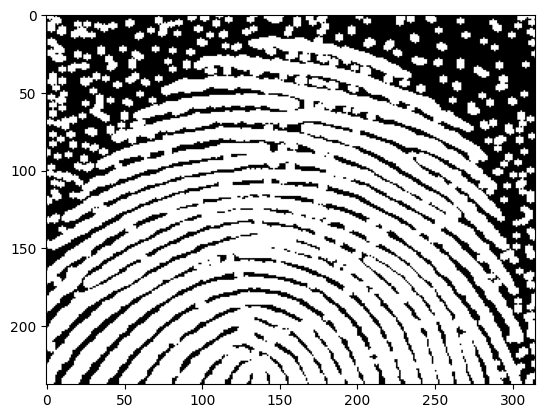

In [13]:
plt.imshow(cv2.dilate(b, se), cmap='gray')

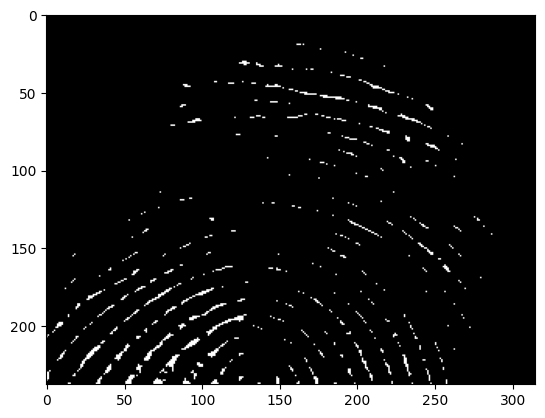

In [14]:
plt.imshow(cv2.erode(b, se), cmap='gray')

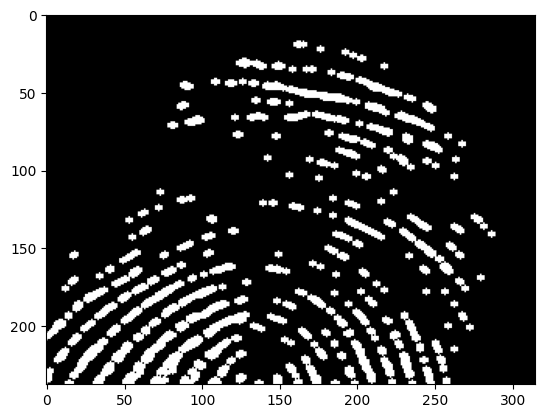

In [15]:
plt.imshow(cv2.morphologyEx(b, cv2.MORPH_OPEN, se), cmap='gray')


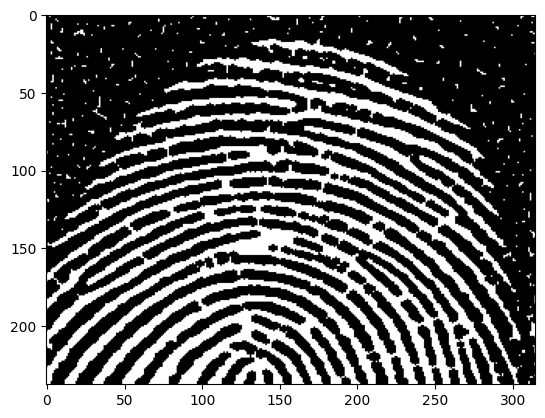

In [16]:
plt.imshow(cv2.morphologyEx(b, cv2.MORPH_CLOSE, se), cmap='gray')


In [22]:

im_coins = cv2.imread('coins.png')


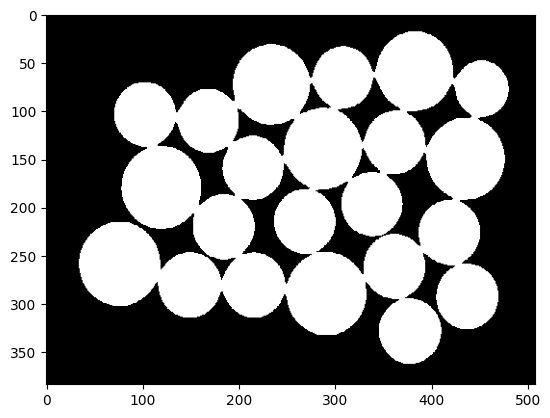

In [23]:
plt.imshow(im_coins, cmap='gray')

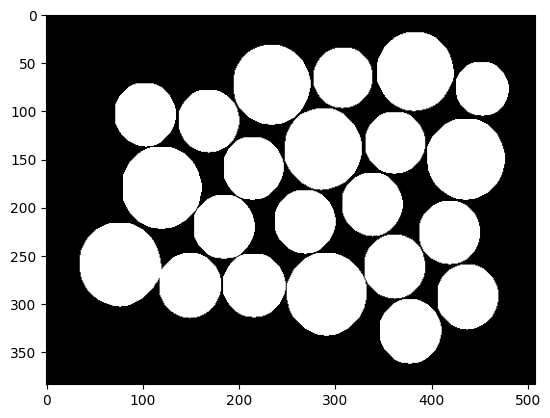

In [37]:
k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
plt.imshow(cv2.morphologyEx(im_coins, cv2.MORPH_OPEN, k), cmap='gray')

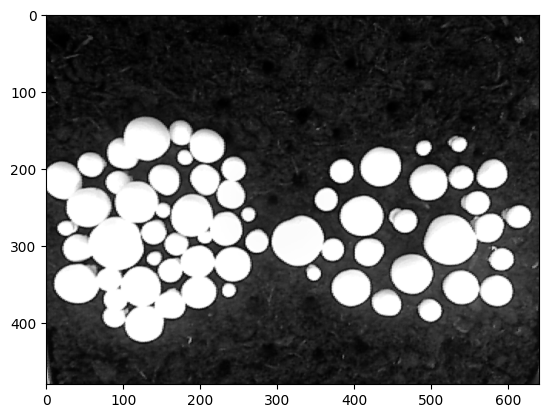

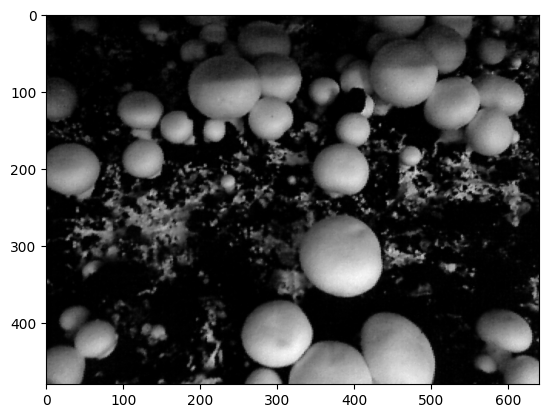

In [43]:
plt.figure()
ms_1 = cv2.imread("mushroom img1.png")
ms_1 = cv2.cvtColor(ms_1, cv2.COLOR_BGR2GRAY)
plt.imshow(ms_1, cmap='gray')
plt.figure()
ms_2 = cv2.imread("mushroom img2.png")
ms_2 = cv2.cvtColor(ms_2, cv2.COLOR_BGR2GRAY)
plt.imshow(ms_2, cmap='gray')


In [41]:
ms_1.

broken-text.png       mushroom img1.png     wk5.ipynb
broken-text.tif       mushroom img2.png     workshop5_seg-2.pdf
coins.gif             noisy-fingerprint.png
coins.png             noisy-fingerprint.tif


Number of segments:  335


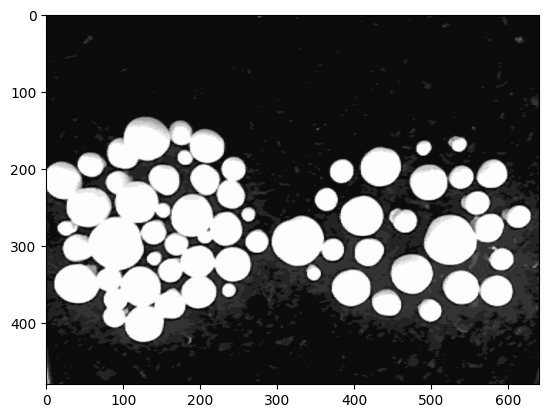

In [48]:
import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth


img = ms_1

# filter to reduce noise
img = cv.medianBlur(img, 3)

# flatten the image
flat_image = img.reshape((-1,3))
flat_image = np.float32(flat_image)

# meanshift
bandwidth = estimate_bandwidth(flat_image, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth = bandwidth, max_iter=800, bin_seeding=True)
ms.fit(flat_image)
labeled=ms.labels_


# get number of segments
segments = np.unique(labeled)
print('Number of segments: ', segments.shape[0])

# get the average color of each segment
total = np.zeros((segments.shape[0], 3), dtype=float)
count = np.zeros(total.shape, dtype=float)
for i, label in enumerate(labeled):
    total[label] = total[label] + flat_image[i]
    count[label] += 1
avg = total/count
avg = np.uint8(avg)

# cast the labeled image into the corresponding average color
res = avg[labeled]
result = res.reshape((img.shape))

plt.imshow(result, cmap='gray')


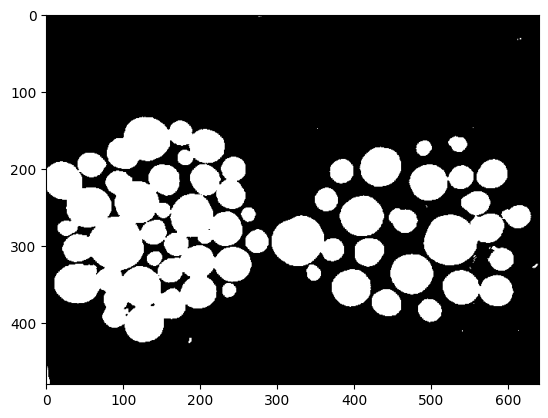

In [49]:
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if result[i][j] < 100:
            result[i][j] = 0
        else:
            result[i][j] = 255
plt.imshow(result, cmap='gray')

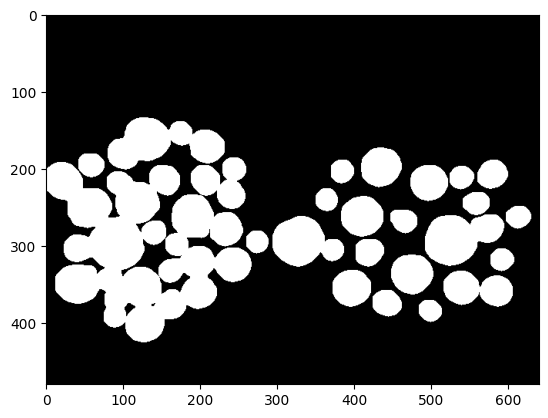

In [97]:
k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
opened = cv2.morphologyEx(result, cv2.MORPH_OPEN, k)
plt.imshow(opened, cmap='gray')


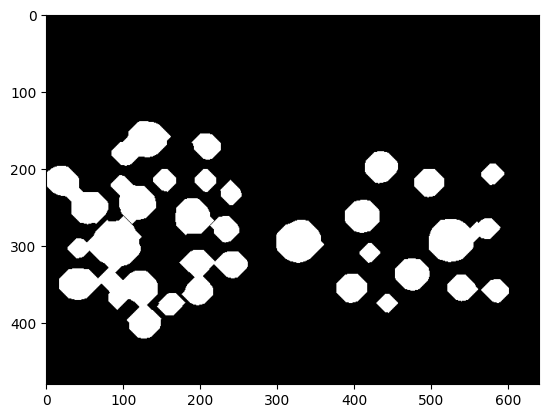

In [116]:
k1 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
k2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
eroded = opened

for i in range(15):
    eroded = cv2.erode(eroded, k1, iterations = 1)
    eroded = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, k1, iterations = 1)


eroded = cv2.dilate(eroded, k1, iterations = 10)

plt.imshow(eroded, cmap='gray')


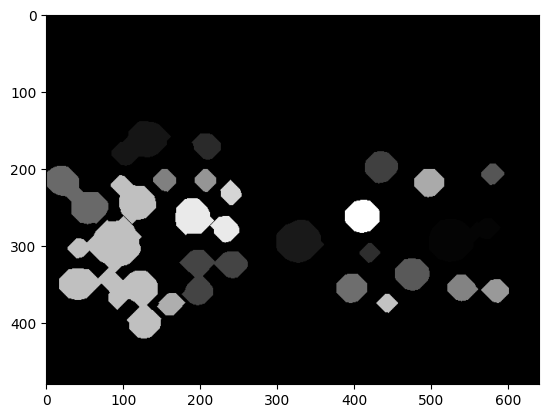

In [117]:
analysis = cv2.connectedComponentsWithStats(eroded, 
                                            4, 
                                            cv2.CV_32S) 
(totalLabels, label_ids, values, centroid) = analysis 
  
# Initialize a new image to 
# store all the output components 
output = np.zeros(eroded.shape, dtype="uint8")

# Loop through each component 
for i in range(1, totalLabels): 
    area = values[i, cv2.CC_STAT_AREA]   
  
    if (area > 10): 
        
        # Labels stores all the IDs of the components on the each pixel 
        # It has the same dimension as the threshold 
        # So we'll check the component 
        # then convert it to 255 value to mark it white 
        componentMask = (label_ids == i).astype("uint8") * i  * 20
          
        # Creating the Final output mask 
        output = cv2.bitwise_or(output, componentMask) 

plt.imshow(output, cmap='gray')


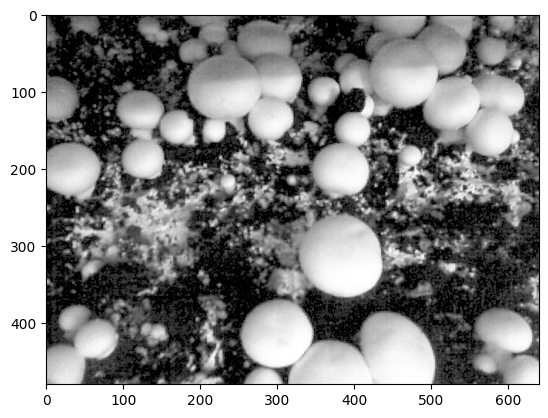

In [118]:
ms_2 = cv2.imread("mushroom img2.png")
ms_2 = cv2.cvtColor(ms_2, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(ms_2) 
plt.imshow(equ, cmap='gray')
